<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#-Комментарий-студента-💎" data-toc-modified-id="-Комментарий-студента-💎-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span> Комментарий студента 💎</a></span></li><li><span><a href="#-Комментарий-студента-💎" data-toc-modified-id="-Комментарий-студента-💎-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span> Комментарий студента 💎</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#-Комментарий-студента-💎" data-toc-modified-id="-Комментарий-студента-💎-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span> Комментарий студента 💎</a></span></li></ul></li></ul></li><li><span><a href="#Промежуточные-выводы." data-toc-modified-id="Промежуточные-выводы.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Промежуточные выводы.</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#-Комментарий-студента-💎" data-toc-modified-id="-Комментарий-студента-💎-2.1.0.1"><span class="toc-item-num">2.1.0.1&nbsp;&nbsp;</span> Комментарий студента 💎</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Промежуточные выводы</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#-Комментарий-студента-💎" data-toc-modified-id="-Комментарий-студента-💎-3.4.0.1"><span class="toc-item-num">3.4.0.1&nbsp;&nbsp;</span> Комментарий студента 💎</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Проект "Отток клиентов из Бета-Банка"

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

В задачу данного проекта входят:
- Исследование и предобработка данных. Проверка наличия пропусков/дубликатов. 
- Прогнозирование, уйдёт клиент из банка в ближайшее время или нет. 
- Построение модели с предельно большим значением *F1*-меры. Метрика должна быть доведена как минимум до 0.59.
- Проверка данной метрики на тестовой выборке.
- Измерение значения *AUC-ROC* и сравнение её значение с *F1*-мерой.
- Общий вывод.



Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
# импортируем нужные библиотеки

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_curve, roc_auc_score
from sklearn.utils import shuffle
from tqdm import tqdm

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Итак мы имеем таблицу из 10000 строк и 14 столбцов, большая часть из которых не имеет пропусков кроме столбца 'Tenure'.  
Для начала приведём название столбцов к snake_case, исследуем причину пропусков в столбце Tenure и скорректируем типы столбцов там, где это применимо.

In [3]:
# приведем названия всех столбцов к нижнему регистру
data.columns = data.columns.str.lower()


In [4]:
# скоррекрируем названия некоторых столбцов согласно snake_case

data = data.rename(columns={
    'rownumber': 'row_number',
    'customerid': 'customer_id',
    'creditscore': 'credit_score',
    'numofproducts': 'num_of_products',
    'hascrcard': 'has_credit_card',
    'isactivemember': 'is_active_member',
    'estimatedsalary': 'estimated_salary'
})


In [5]:
# приведём значения столбцов также к lower case
data['surname'] = data['surname'].str.lower()
data['geography'] = data['geography'].str.lower()
data['gender'] = data['gender'].str.lower()

In [6]:
# проверим на наличие явных и неявных дубликатов
display(data.duplicated().sum())
display(data['customer_id'].duplicated().sum())
data[['surname', 'gender', 'geography', 'age', 'balance']].duplicated().sum()

0

0

48

In [7]:
data.drop_duplicates(['surname', 'gender', 'geography', 'age', 'balance'], inplace=True, ignore_index=True)


In [8]:
# теперь перейдем к анализу столбца tenure и пропускам
display(data['tenure'].isna().sum() / data['tenure'].shape[0])
data[data['tenure'].isna()].head(10)

0.09103697749196142

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited
30,31,15589475,azikiwe,591,spain,female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,yin,550,germany,male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,trevisani,585,germany,male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,parkhill,655,germany,male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,hunter,742,germany,male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,mills,543,france,female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,ndukaku,652,spain,female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,capon,730,spain,male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,fanucci,413,france,male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,rowntree,538,germany,male,39,NaN,108055.10,2,1,0,27231.26,0


Мы видим, что в столбце tenure имеется порядка 9% процентов пропусков.  

Поскольку данный столбец потенциально можно иметь большое значение для нашего целевого признака (длительность взаимодействия клиента и банка может существенно влиять на решение клиента покинуть банк), мы не можем его просто так отбросить.  
К сожалению, решение заполнить его нулями или другими значениями (к примеру, медианой) также может быть спорно. ввиду того, что это тоже может повлиять на неправильные выводы модели. Поэтому для данного случая попробуем исключить пустые строки из нашего датасета.

In [9]:
data = data.dropna()
data.reset_index(drop=True, inplace=True)


In [10]:
# изменим тип данных в столбцах, где это необходимо
data['tenure'] = data['tenure'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9046 entries, 0 to 9045
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        9046 non-null   int64  
 1   customer_id       9046 non-null   int64  
 2   surname           9046 non-null   object 
 3   credit_score      9046 non-null   int64  
 4   geography         9046 non-null   object 
 5   gender            9046 non-null   object 
 6   age               9046 non-null   int64  
 7   tenure            9046 non-null   int64  
 8   balance           9046 non-null   float64
 9   num_of_products   9046 non-null   int64  
 10  has_credit_card   9046 non-null   int64  
 11  is_active_member  9046 non-null   int64  
 12  estimated_salary  9046 non-null   float64
 13  exited            9046 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 989.5+ KB


Теперь исследуем имеющися столбцы с количественными переменными и проверим их на наличие выбросов/аномалий.

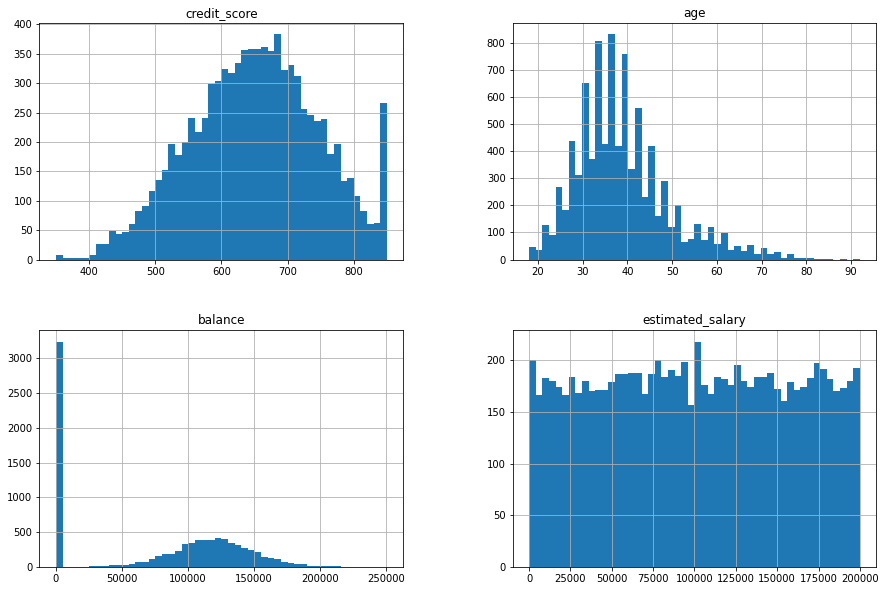

In [11]:
data[['credit_score', 'age', 'balance', 'estimated_salary']].hist(figsize=(15, 10), bins=50)
None

Видим, что в целом данные распределены в столбцах адеватно, без каких-либо видимых больших выбросов или аномалий.

Итак в первом этапе мы:
- Ознакомились с имеющимися данными.
- Исследовали имеющиеся данные на предмет пропусков и дубликатов. Удалили строки с дубликатами и пропусками из датасета.
- Изменили тип данных для тех столбцов, где типы не соответствовали содержанию столбца (столбце tenure).
- Исследовали имеющиеся количественные переменные и на предмет выбросов и аномалий. Данные распределены адекватно и не потребовали вмешательств.

## Исследование задачи

В течение второго этапа нам необходимо:
- Определить и выделить признаки, на которых мы будем обучать модель, а также целевой признак.
- Разделить выборку на обучающую, валидационную и тестовую.
- Оценить баланс классов целевого признака и попытаться построить модель без какой-либо балансировки. Оценить результаты.

Начнём по порядку.

Первое, что нам необходимо определить - какие столбцы могут вилять на наш целевой признак и могут помочь нашей модели выявить закономерности.  
Пойдем от обратного и выделим столбцы, которые скорее всего не имеют отношения к принятому клиентом решению о покидании банка.

К таким столбцам в первую очередь можно отнести уникальные идентификаторы - порядковый номер и идентификатор пользователя (row_number, customer_id), которые, ввиду своей уникальности, не имеют никакой зависимости с exited.  

Будем считать, что остальные столбцы могут иметь хоть какую-то минимальную значимость при определении целевого показателя. (к примеру, за последний год во Франции прошла антиреклама данного банка, или банк каким-то образом выставил себя в некрасивом свете перед женской аудиторией)

In [12]:
# выделим две группы столбцов - обычные признаки, из которых удалим наш целевой признак и столбцы, которые мы описали ранее
features = data.drop(['row_number', 'customer_id', 'surname', 'exited'], axis=1)

# и целевой признак
target = data['exited']

In [13]:
# оценим баланс классов в нашем целевом признаке
data['exited'].mean()

0.20451028078708822

Выходит, что в нашем целевом признаке только 20% занимают единицы (клиент покинул банк) и 80% - нули (клиент остался).  
Возьмем это на заметку для следующего этапа проекта.

Теперь разделим наш датасет на три выборки - обучающую, валидационную и тестовую - в соотношении 3:1:1. Но прежде чем переходить к разделению на выборки и обучению моделей нам необходимо закодировать имеющиеся данные. Будем использовать метод One hot encoding.

In [14]:
# используем метод One hot encoding с учетом дамми-ловушки
features_ohe = pd.get_dummies(features, drop_first=True)
features_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [15]:
# сначала выделим тестовую и не-тестовую части
features_not_test, features_test, target_not_test, target_test = train_test_split(
    features_ohe,
    target,
    test_size=0.2,
    random_state=12345
)

# затем не-тестовую часть разделим на обучающую и валидационную
features_train, features_valid, target_train, target_valid = train_test_split(
    features_not_test,
    target_not_test,
    test_size=0.25,
    random_state=12345
)
display(features_train.shape[0], features_valid.shape[0], features_test.shape[0])

5427

1809

1810

Найдем F1-метрику для трёх видов моделей - дерева решений, случайного леса и логистической регрессии - и проверим их на тестовых выборках.

Начнём, как обычно, по порядку с дерева решений.


In [16]:
for depth in range(1, 21):
    decision_tree = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    decision_tree.fit(features_train, target_train)
    tree_prediction = decision_tree.predict(features_valid)

    tree_f1_score = f1_score(target_valid, tree_prediction)
    print(depth, tree_f1_score)

1 0.0
2 0.4797507788161994
3 0.3643564356435644
4 0.4839255499153976
5 0.5331230283911672
6 0.4908180300500835
7 0.5198098256735342
8 0.48434925864909384
9 0.5406203840472673
10 0.5083207261724659
11 0.5107604017216643
12 0.5147679324894515
13 0.5199449793672627
14 0.5246338215712383
15 0.5118110236220472
16 0.5065274151436031
17 0.5064935064935064
18 0.5037783375314862
19 0.4884318766066838
20 0.49625935162094764


In [17]:
# также посчитаем значение AUC_ROC и сравним его с метрикой F1
tree_pred_proba = decision_tree.predict_proba(features_valid)
tree_pred_proba_one = tree_pred_proba[:, 1]

auc_roc = roc_auc_score(target_valid, tree_pred_proba_one)
auc_roc

0.6799328029358421

Как мы видим, наибольшее значение метрики F1 (0.54) достигается при глубине дерева = 9.  

Значение AUC_ROC при этом находится на уровне 0.68.

Тем не менее, этот показатель недостаточен по нашему условию задачи, поэтому данная модель точно не будет выбрана оптимальной.

In [18]:
# перейдем к следующей модели - модели случайного леса
# подберём оптимальное значение гиперпараметра max_depth и n_estimators
best_f1_score = 0
best_depth = 0
best_est = 0

for est in tqdm(range(60, 161, 20)):
    for depth in range(5, 21):
        random_forest = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        random_forest.fit(features_train, target_train)
        forest_predictions = random_forest.predict(features_valid)
        
        forest_f1_score = f1_score(target_valid, forest_predictions)
                
        # print('F1 score =', forest_f1_score, 'depth =', depth, 'est =', est)
        
        if forest_f1_score > best_f1_score:
            best_f1_score = forest_f1_score
            best_depth = depth
            best_est = est
            
print('------------------------------------------------')
print('Best F1 score = {:.3f} | best_depth = {}, best_est = {}'.format(best_f1_score, best_depth, best_est))


100%|██████████| 6/6 [00:55<00:00,  9.18s/it]

------------------------------------------------
Best F1 score = 0.544 | best_depth = 16, best_est = 120


In [19]:
# посчитаем метрику AUC_ROC
forest_pred_proba = random_forest.predict_proba(features_valid)
forest_pred_proba_one = forest_pred_proba[:, 1]

auc_roc = roc_auc_score(target_valid, forest_pred_proba_one)
auc_roc

0.844808256347767

Как мы видим, максимальное значение метрики F1, которое мы смогли достичь при глубине в 16 и n_estimators = 120 - это 0.544.  
Показатель уже лучше чем у дерева решений, но по-прежнему не дотягивает до целевого показателя.

Продолжаем изучение моделей. Переходим к логистической регрессии.

In [20]:
# также перед обучением модели регрессии применим нормализацию данных
scaler = StandardScaler()
scaler.fit(features_train)

features_train_scaled = scaler.transform(features_train)
features_valid_scaled = scaler.transform(features_valid)


In [21]:
regression = LogisticRegression(solver='liblinear', random_state=12345)
regression.fit(features_train_scaled, target_train)
regression_prediction = regression.predict(features_valid_scaled)

regression_f1_score = f1_score(target_valid, regression_prediction)
regression_f1_score

0.24561403508771934

In [22]:
# посчитаем значение AUC_ROC и сравним его с метрикой F1
regression_pred_proba = regression.predict_proba(features_valid)
regression_pred_proba_one = regression_pred_proba[:, 1]

auc_roc = roc_auc_score(target_valid, regression_pred_proba_one)
auc_roc

0.5007102272727273

Значение метрики F1 для логистической регрессии даже с учетом нормализации получилось равным 0.25, что значительно хуже нашей целевой планки и показателей других моделей. Скорее всего на эту модель сильнее всего влияет дисбаланс классов, который мы по условию задачи на данном этапе не устраняли, поэтому нам еще предстоит оценить этот показатель повторно на следующем этапе.

### Промежуточные выводы.

Итак в течение данного этапа мы выполнили следующие действия:
- Определили и выделили признаки, на которых мы будем обучать модель, а также целевой признак.
- Разделили выборку на обучающую, валидационную и тестовую.
- Оценили баланс классов целевого признака и построили три типа моделей без какой-либо балансировки:
    - Модель дерева решений показала наибольшую метрику F1 (0.54) при значении праметра max_depth=9.
    - Модель случайного леса смогла довести показатель F1 до 0.544 при max_depth=16 и n_estimators=120.
    - Модель логистической регрессии показала самый слабый результат F1 в 0.25.
    
В следующем этапе мы проверим показатели данных моделей после работы с дисбалансом классов.

## Борьба с дисбалансом

В данном шаге нам необходимо:
- Улучшить качество моделей, скорректировав дисбаланс классов. 
- Повторно обучить разные модели и, изменяя гиперпараметры, определить лучшую.

Как мы уже выяснили на предыдущем этапе, наш целевой показатель слабо сбалансирован - единицы составляют лишь 20% от всего столбца. Остальное - нули. 

Попробуем применить различные методы балансировки для улучшения метрик наших моделей, в частности, взвешивание классов, увеличение и уменьшение выборки, а также изменене порога для логистической регрессии.

### Логистическая регрессия

Для начала работы с логистической регрессией попробуем применить метод балансировки веса для разных классов.

In [23]:
regression_balanced = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=12345)
regression_balanced.fit(features_train_scaled, target_train)
regression_balanced_prediction = regression_balanced.predict(features_valid_scaled)

regression_f1_score = f1_score(target_valid, regression_balanced_prediction)
regression_f1_score

0.5112359550561797

In [24]:
# также посчитаем значение AUC_ROC и сравним его с метрикой F1
regression_balanced_pred_proba = regression_balanced.predict_proba(features_valid)
regression_balanced_pred_proba_one = regression_balanced_pred_proba[:, 1]

auc_roc = roc_auc_score(target_valid, regression_balanced_pred_proba_one)
auc_roc

0.5007102272727273

Как мы видим, даже с применением одного гиперпараметра F1 метрика практически удвоилась.

Теперь попробуем метод изменения порога регрессии для базовой модели, без измерения веса.

In [25]:
regression_proba = regression.predict_proba(features_valid_scaled)
regression_proba_one = regression_proba[:, 1]

for threshold in np.arange(0.1, 0.3, 0.01):
    regression_predicted_valid = regression_proba_one > threshold
    tree_f1_score = f1_score(target_valid, regression_predicted_valid)

    print("Порог = {:.2f} | Метрика F1 = {:.3f}".format(
        threshold, tree_f1_score))


Порог = 0.10 | Метрика F1 = 0.447
Порог = 0.11 | Метрика F1 = 0.449
Порог = 0.12 | Метрика F1 = 0.453
Порог = 0.13 | Метрика F1 = 0.464
Порог = 0.14 | Метрика F1 = 0.473
Порог = 0.15 | Метрика F1 = 0.484
Порог = 0.16 | Метрика F1 = 0.487
Порог = 0.17 | Метрика F1 = 0.489
Порог = 0.18 | Метрика F1 = 0.489
Порог = 0.19 | Метрика F1 = 0.490
Порог = 0.20 | Метрика F1 = 0.490
Порог = 0.21 | Метрика F1 = 0.498
Порог = 0.22 | Метрика F1 = 0.499
Порог = 0.23 | Метрика F1 = 0.502
Порог = 0.24 | Метрика F1 = 0.492
Порог = 0.25 | Метрика F1 = 0.492
Порог = 0.26 | Метрика F1 = 0.491
Порог = 0.27 | Метрика F1 = 0.472
Порог = 0.28 | Метрика F1 = 0.472
Порог = 0.29 | Метрика F1 = 0.465


При использовании метода изменения порога регрессии, максимальное значение метрики F1 у нас получилось равным 0.502, что пока также не удовлетворяет нашему условию.

Теперь попробуем методы **up & downsampling** для уменьшения и увеличения выборки строк с определенным классом для достижения соответствующего баланса.  
Сначала используем только один из этих двух методов, а затем попробуем их использователь совместно.

In [26]:
# создадим функцию для увеличения количества строк с положительным значением целевого признака (1)
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [27]:
# и аналогичную функцию для уменьшения количества строк с нулевым значением целевого признака
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled


In [28]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)
target_train_upsampled.mean()

0.4984423676012461

In [29]:
# нормализуем значения в новой upsampled выборке

scaler = StandardScaler()
scaler.fit(features_train_upsampled)

features_train_upsampled_scaled = scaler.transform(features_train_upsampled)
features_valid_upsampled_scaled = scaler.transform(features_valid)

In [30]:
regression = LogisticRegression(solver='liblinear', random_state=12345)
regression.fit(features_train_upsampled_scaled, target_train_upsampled)
regression_prediction = regression.predict(features_valid_upsampled_scaled)

regression_f1_score = f1_score(target_valid, regression_prediction)
regression_f1_score

0.5121951219512195

In [31]:
# теперь проведем аналогичные действия с методом downsample
features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.25)
target_train_downsampled.mean()


0.49838486386709735

In [32]:
# нормализуем значения в downsampled выборке

scaler = StandardScaler()
scaler.fit(features_train_downsampled)

features_train_downsampled_scaled = scaler.transform(features_train_downsampled)
features_valid_downsampled_scaled = scaler.transform(features_valid)

In [33]:
regression = LogisticRegression(solver='liblinear', random_state=12345)
regression.fit(features_train_downsampled_scaled, target_train_downsampled)
regression_prediction = regression.predict(features_valid_downsampled_scaled)

regression_f1_score = f1_score(target_valid, regression_prediction)
regression_f1_score

0.5075187969924813

In [34]:
# теперь попробуем использовать оба метода сразу (сократим количество класса 0 и увеличим количество класса 1)
# так мы сохраним больше строк для обучения и создадим меньше дубликатов класса 1
features_train_upsampled_for_down, target_train_upsampled_for_down = upsample(features_train, target_train, 2)

features_train_updownsampled, target_train_updownsampled = downsample(features_train_upsampled_for_down, target_train_upsampled_for_down, 0.5)
target_train_updownsampled.mean()


0.49838486386709735

In [35]:
# нормализуем значения в updownsampled выборке

scaler = StandardScaler()
scaler.fit(features_train_updownsampled)

features_train_updownsampled_scaled = scaler.transform(features_train_updownsampled)
features_valid_updownsampled_scaled = scaler.transform(features_valid)

In [36]:
regression = LogisticRegression(solver='liblinear', random_state=12345)
regression.fit(features_train_updownsampled_scaled, target_train_updownsampled)
regression_prediction = regression.predict(features_valid_updownsampled_scaled)

regression_f1_score = f1_score(target_valid, regression_prediction)
regression_f1_score

0.5032863849765258

Итого для логистической регрессии мы получили следующие характеристики F1:
- При балансировке весов - 0.511;
- При изменении порога - 0.502;
- При upsampling - 0.512;
- При downsampling - 0.508;
- При одновременном использовании up & downsampling - 0.503.

Тем не менее, все эти показатели не проходят наш целевой показатель F1, поэтому переходим к дальнейшим моделям - дереву решений и случайному лесу.

### Дерево решений

Теперь переходим к следующему типу модели - к дереву решений - и попробуем использовать наши сбалансированные различными методами выборки для этой модели.

In [37]:
# начнем с устранения баланса классов через гиперпараметр модели
for depth in range(1, 21):
    decision_tree = DecisionTreeClassifier(class_weight='balanced', max_depth=depth, random_state=12345)
    decision_tree.fit(features_train, target_train)
    tree_prediction = decision_tree.predict(features_valid)

    tree_f1_score = f1_score(target_valid, tree_prediction)
    print('Метрика F1 = {:.3f} | max_depth = {}'.format(tree_f1_score, depth))


Метрика F1 = 0.508 | max_depth = 1
Метрика F1 = 0.530 | max_depth = 2
Метрика F1 = 0.507 | max_depth = 3
Метрика F1 = 0.559 | max_depth = 4
Метрика F1 = 0.559 | max_depth = 5
Метрика F1 = 0.591 | max_depth = 6
Метрика F1 = 0.583 | max_depth = 7
Метрика F1 = 0.580 | max_depth = 8
Метрика F1 = 0.566 | max_depth = 9
Метрика F1 = 0.521 | max_depth = 10
Метрика F1 = 0.515 | max_depth = 11
Метрика F1 = 0.501 | max_depth = 12
Метрика F1 = 0.487 | max_depth = 13
Метрика F1 = 0.480 | max_depth = 14
Метрика F1 = 0.468 | max_depth = 15
Метрика F1 = 0.460 | max_depth = 16
Метрика F1 = 0.461 | max_depth = 17
Метрика F1 = 0.457 | max_depth = 18
Метрика F1 = 0.448 | max_depth = 19
Метрика F1 = 0.449 | max_depth = 20


In [38]:
# начнём с upsampling
for depth in range(1, 21):
    decision_tree = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    decision_tree.fit(features_train_upsampled, target_train_upsampled)
    tree_prediction = decision_tree.predict(features_valid)

    tree_f1_score = f1_score(target_valid, tree_prediction)
    print('Метрика F1 = {:.3f} | max_depth = {}'.format(tree_f1_score, depth))


Метрика F1 = 0.508 | max_depth = 1
Метрика F1 = 0.530 | max_depth = 2
Метрика F1 = 0.507 | max_depth = 3
Метрика F1 = 0.559 | max_depth = 4
Метрика F1 = 0.559 | max_depth = 5
Метрика F1 = 0.591 | max_depth = 6
Метрика F1 = 0.580 | max_depth = 7
Метрика F1 = 0.579 | max_depth = 8
Метрика F1 = 0.568 | max_depth = 9
Метрика F1 = 0.526 | max_depth = 10
Метрика F1 = 0.515 | max_depth = 11
Метрика F1 = 0.500 | max_depth = 12
Метрика F1 = 0.483 | max_depth = 13
Метрика F1 = 0.486 | max_depth = 14
Метрика F1 = 0.479 | max_depth = 15
Метрика F1 = 0.483 | max_depth = 16
Метрика F1 = 0.464 | max_depth = 17
Метрика F1 = 0.462 | max_depth = 18
Метрика F1 = 0.460 | max_depth = 19
Метрика F1 = 0.462 | max_depth = 20


In [39]:
# далее у нас идёт downsampling
for depth in range(1, 21):
    decision_tree = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    decision_tree.fit(features_train_downsampled, target_train_downsampled)
    tree_prediction = decision_tree.predict(features_valid)

    tree_f1_score = f1_score(target_valid, tree_prediction)
    print('Метрика F1 = {:.3f} | max_depth = {}'.format(tree_f1_score, depth))

Метрика F1 = 0.515 | max_depth = 1
Метрика F1 = 0.546 | max_depth = 2
Метрика F1 = 0.562 | max_depth = 3
Метрика F1 = 0.526 | max_depth = 4
Метрика F1 = 0.562 | max_depth = 5
Метрика F1 = 0.582 | max_depth = 6
Метрика F1 = 0.593 | max_depth = 7
Метрика F1 = 0.590 | max_depth = 8
Метрика F1 = 0.553 | max_depth = 9
Метрика F1 = 0.555 | max_depth = 10
Метрика F1 = 0.532 | max_depth = 11
Метрика F1 = 0.516 | max_depth = 12
Метрика F1 = 0.505 | max_depth = 13
Метрика F1 = 0.504 | max_depth = 14
Метрика F1 = 0.498 | max_depth = 15
Метрика F1 = 0.495 | max_depth = 16
Метрика F1 = 0.493 | max_depth = 17
Метрика F1 = 0.494 | max_depth = 18
Метрика F1 = 0.495 | max_depth = 19
Метрика F1 = 0.500 | max_depth = 20


In [40]:
# и наконец updownsampling
for depth in range(1, 21):
    decision_tree = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    decision_tree.fit(features_train_updownsampled, target_train_updownsampled)
    tree_prediction = decision_tree.predict(features_valid)

    tree_f1_score = f1_score(target_valid, tree_prediction)
    print('Метрика F1 = {:.3f} | max_depth = {}'.format(tree_f1_score, depth))

Метрика F1 = 0.493 | max_depth = 1
Метрика F1 = 0.509 | max_depth = 2
Метрика F1 = 0.494 | max_depth = 3
Метрика F1 = 0.539 | max_depth = 4
Метрика F1 = 0.565 | max_depth = 5
Метрика F1 = 0.584 | max_depth = 6
Метрика F1 = 0.559 | max_depth = 7
Метрика F1 = 0.545 | max_depth = 8
Метрика F1 = 0.560 | max_depth = 9
Метрика F1 = 0.530 | max_depth = 10
Метрика F1 = 0.533 | max_depth = 11
Метрика F1 = 0.554 | max_depth = 12
Метрика F1 = 0.533 | max_depth = 13
Метрика F1 = 0.522 | max_depth = 14
Метрика F1 = 0.527 | max_depth = 15
Метрика F1 = 0.525 | max_depth = 16
Метрика F1 = 0.528 | max_depth = 17
Метрика F1 = 0.532 | max_depth = 18
Метрика F1 = 0.519 | max_depth = 19
Метрика F1 = 0.535 | max_depth = 20


Итого для модели дерева решений мы получили следующие результаты для метрики F1 и значения max_depth:
- Балансировка весов - 0.591 при max_depth=6;
- При upsampling - 0.591 при max_depth=6;
- При downsampling - 0.593 при max_depth=7;
- При одновременном использовании up & downsampling - 0.584 при max_depth=6.

Как мы видим, данная модель показывает себя лучше чем логистическая регресиия, а в случаях точечного upsampling и downsampling даже сумела превзойти наш целевой порог F1.  

In [41]:
# также посчитаем значение AUC_ROC для лучшей версии модели и сравним его с метрикой F1
decision_tree = DecisionTreeClassifier(max_depth=7, random_state=12345)
decision_tree.fit(features_train_downsampled, target_train_downsampled)

decision_tree_pred_proba = decision_tree.predict_proba(features_valid)
decision_tree_pred_proba_one = decision_tree_pred_proba[:, 1]

auc_roc = roc_auc_score(target_valid, decision_tree_pred_proba_one)
auc_roc

0.8226078978689639

### Случайный лес

У нас остался последний вид модели для проверки - модель случайного леса. Проверим его на аналогичным данных, где мы устранили баланс классов и подберем оптимальные значения max_depth и n_estimators.

In [42]:
# начнем с устранения баланса классов через гиперпараметр модели
best_f1_score = 0
best_depth = 0
best_est = 0

for est in tqdm(range(60, 161, 20)):
    for depth in range(5, 21):
        random_forest = RandomForestClassifier(class_weight='balanced', max_depth=depth, n_estimators=est, random_state=12345)
        random_forest.fit(features_train, target_train)
        forest_predictions = random_forest.predict(features_valid)
        
        forest_f1_score = f1_score(target_valid, forest_predictions)
                
        # print('F1 score =', forest_f1_score, 'depth =', depth, 'est =', est)
        
        if forest_f1_score > best_f1_score:
            best_f1_score = forest_f1_score
            best_depth = depth
            best_est = est
            
print('------------------------------------------------')
print('Best F1 score = {:.3f} | best_depth = {}, best_est = {}'.format(best_f1_score, best_depth, best_est))


100%|██████████| 6/6 [00:54<00:00,  9.04s/it]

------------------------------------------------
Best F1 score = 0.635 | best_depth = 7, best_est = 160


In [43]:
# теперь перейдем с upsampling
best_f1_score = 0
best_depth = 0
best_est = 0

for est in tqdm(range(60, 161, 20)):
    for depth in range(5, 21):
        random_forest = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        random_forest.fit(features_train_upsampled, target_train_upsampled)
        forest_predictions = random_forest.predict(features_valid)
        
        forest_f1_score = f1_score(target_valid, forest_predictions)
                
        # print('F1 score =', forest_f1_score, 'depth =', depth, 'est =', est)
        
        if forest_f1_score > best_f1_score:
            best_f1_score = forest_f1_score
            best_depth = depth
            best_est = est
            
print('------------------------------------------------')
print('Best F1 score = {:.3f} | best_depth = {}, best_est = {}'.format(best_f1_score, best_depth, best_est))


100%|██████████| 6/6 [01:11<00:00, 11.88s/it]

------------------------------------------------
Best F1 score = 0.634 | best_depth = 7, best_est = 140


In [44]:
# аналогично теперь с downsampling
best_f1_score = 0
best_depth = 0
best_est = 0

for est in tqdm(range(60, 161, 20)):
    for depth in range(5, 21):
        random_forest = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        random_forest.fit(features_train_downsampled, target_train_downsampled)
        forest_predictions = random_forest.predict(features_valid)
        
        forest_f1_score = f1_score(target_valid, forest_predictions)
                
        # print('F1 score =', forest_f1_score, 'depth =', depth, 'est =', est)
        
        if forest_f1_score > best_f1_score:
            best_f1_score = forest_f1_score
            best_depth = depth
            best_est = est
            
print('------------------------------------------------')
print('Best F1 score = {:.3f} | best_depth = {}, best_est = {}'.format(best_f1_score, best_depth, best_est))

100%|██████████| 6/6 [00:29<00:00,  4.98s/it]

------------------------------------------------
Best F1 score = 0.630 | best_depth = 10, best_est = 160


In [45]:
# и последняя проверка - с updownsampling
best_f1_score = 0
best_depth = 0
best_est = 0

for est in tqdm(range(60, 161, 20)):
    for depth in range(5, 21):
        random_forest = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        random_forest.fit(features_train_updownsampled, target_train_updownsampled)
        forest_predictions = random_forest.predict(features_valid)
        
        forest_f1_score = f1_score(target_valid, forest_predictions)
                
        # print('F1 score =', forest_f1_score, 'depth =', depth, 'est =', est)
        
        if forest_f1_score > best_f1_score:
            best_f1_score = forest_f1_score
            best_depth = depth
            best_est = est
            
print('------------------------------------------------')
print('Best F1 score = {:.3f} | best_depth = {}, best_est = {}'.format(best_f1_score, best_depth, best_est))

100%|██████████| 6/6 [00:44<00:00,  7.41s/it]

------------------------------------------------
Best F1 score = 0.624 | best_depth = 11, best_est = 120


Итак, для модели случайного леса мы получили самые большие показатели F1 метрики:
- Взвешивание классов - 0.635, при max_depth=7, n_estimators=160;
- Upsampling - 0.634 при max_depth=7, n_estimators=140; 
- Downsampling - 0.629 при max_depth=10, n_estimators=160;
- Updownsampling - 0.624 при max_depth=11, n_estimators=120;


In [46]:
# также посчитаем значение AUC_ROC для лучшей версии модели и сравним его с метрикой F1
random_forest = RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=160, random_state=12345)
random_forest.fit(features_train, target_train)

decision_tree_pred_proba = random_forest.predict_proba(features_valid)
decision_tree_pred_proba_one = decision_tree_pred_proba[:, 1]

auc_roc = roc_auc_score(target_valid, decision_tree_pred_proba_one)
auc_roc

0.8594139650872819

### Промежуточные выводы

Итак мы протестировали все три типа модели после балансировки классов различными методами.  
Ниже указаны наивысшие полученные значения метрики F1 и использованные при этом значения гиперпараметров:
1. Логистическая регрессия:
    - Базовая модель - 0.246;
    - При балансировке весов - **0.511**;
    - При изменении порога - 0.502;
    - При upsampling - 0.512;
    - При downsampling - 0.508;
    - При одновременном использовании up & downsampling - 0.503.
2. Дерево решений:
    - Базовая модель - 0.54 при max_depth=9;
    - Балансировка весов - 0.591 при max_depth=6;
    - При upsampling - 0.591 при max_depth=6;
    - При downsampling - **0.593** при max_depth=7;
    - При одновременном использовании up & downsampling - 0.584 при max_depth=6.
3. Случайный лес:
    - Базовая модель - 0.544, при max_depth=16, n_estimators=120;
    - Взвешивание классов - **0.635**, при max_depth=7, n_estimators=160;
    - Upsampling - 0.634 при max_depth=7, n_estimators=140; 
    - Downsampling - 0.629 при max_depth=10, n_estimators=160;
    - Updownsampling - 0.624 при max_depth=11, n_estimators=120;

Из всех трёх моделей модель случайного леса показала наилучший результат, поэтому именно её мы и выберем для дальнейшего тестирования.

## Тестирование модели

На последнем этапе нам необходимо протестировать нашу лучшую модель на тестовой выборке, которую мы выделили из начальных данных и никак не использовали в процессе обучения.

Также для этой оценки мы будем использовать вычисленные ранее значения гиперпараметров, показавшие наилучший результат.

In [47]:
random_forest = RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=160, random_state=12345)
random_forest.fit(features_train, target_train)
forest_predictions = random_forest.predict(features_test)

forest_f1_score = f1_score(target_test, forest_predictions)

print('Метрика F1 = {:.3f} | max_depth = 7, n_esimators = 160'.format(forest_f1_score))

Метрика F1 = 0.621 | max_depth = 7, n_esimators = 160


Теперь проиллюстрируем полученные результаты на графике.

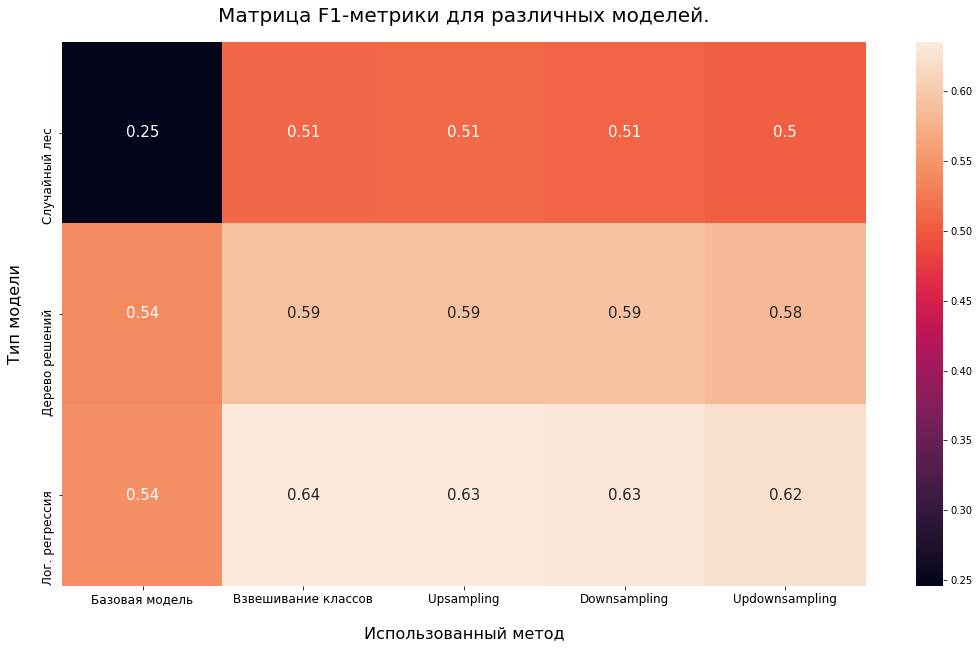

In [48]:
final_results = pd.DataFrame(
    [[0.246, 0.511, 0.512, 0.508, 0.503],
     [0.54, 0.591, 0.591, 0.593, 0.584],
     [0.544, 0.635, 0.634, 0.629, 0.624]
    ],
    columns=[
        'base_model',
        'class_weight',
        'upsampling',
        'downsampling',
        'updownsampling'
    ],
    index=[
        'logistic_regression',
        'decision_tree',
        'random_forest'
    ]
)


plt.figure(figsize=(18,10))
plt.title(
    'Матрица F1-метрики для различных моделей.',\
    fontsize='20',
    pad=20
)


fig = sns.heatmap(final_results, annot=True, annot_kws={"size": 15})
fig.set_xticklabels(
    [
        'Базовая модель',
        'Взвешивание классов',
        'Upsampling',
        'Downsampling',
        'Updownsampling'
    ],
    fontsize='12'
)
plt.ylabel('Тип модели', fontsize='16', labelpad=20)
plt.xlabel('Использованный метод', fontsize='16', labelpad=20)
fig.set_yticklabels(['Случайный лес', 'Дерево решений', 'Лог. регрессия'], fontsize='12')
None

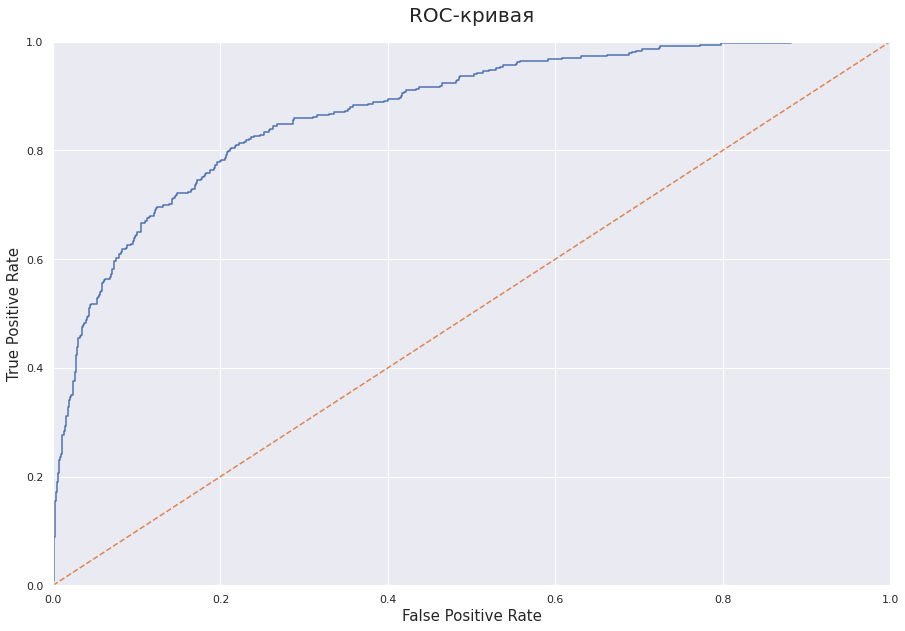

In [49]:
# теперь построим ROC кривую
forest_probabilities_test = random_forest.predict_proba(features_test)
forest_probabilities_one_test = forest_probabilities_test[:, 1]
forest_predictions = random_forest.predict(features_test)

fpr, tpr, thresholds = roc_curve(target_test, forest_probabilities_one_test)

plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")

plt.plot(fpr, tpr)
# построим референсную линию случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('False Positive Rate', fontsize='15')
plt.ylabel('True Positive Rate', fontsize='15')
plt.title('ROC-кривая', fontsize='20', pad=20)
plt.show()

In [50]:
# оценим значение AUC ROC
auc_roc = roc_auc_score(target_test, forest_probabilities_one_test)
auc_roc

0.8733076435552697

Итого на тестовой выборке для нашей выбранной модели случайного леса и выбранных гиперпараметров мы получили значение метрики F1 = 0.621, что удовлетворяет нашему заданному пороговому значению в 0.59.

После этого мы проиллюстрировали полученные в работы показатели метрик F1 для различных моделей и подходов к балансировке данных, а также вычислили значение AUC ROC.

## Общий вывод

Итак, мы завершили проект "Отток клиентов из Бета-Банка".  
Нам были предоставлены исторические данные о поведении клиентов и расторжении договоров с банком, на основании которых предлагалось разработать модель, предсказывающую поведение будущих клиентов на основании имеющихся признаков.

Ключевой метрикой оценки работы модели была F1-метрика, итоговое значение которой должно было быть не менее 0.59.

В течение проекта мы протестировали три типа модели - дерево решений, случайный лес и логистическую регрессию - до и после балансировки классов различными методами.  
Ниже указаны наивысшие полученные значения метрики F1 и использованные при этом значения гиперпараметров:
1. Логистическая регрессия:
    - Базовая модель - 0.246;
    - При балансировке весов - **0.511**;
    - При изменении порога - 0.502;
    - При upsampling - 0.512;
    - При downsampling - 0.508;
    - При одновременном использовании up & downsampling - 0.503.
2. Дерево решений:
    - Базовая модель - 0.54 при max_depth=9;
    - Балансировка весов - 0.591 при max_depth=6;
    - При upsampling - 0.591 при max_depth=6;
    - При downsampling - **0.593** при max_depth=7;
    - При одновременном использовании up & downsampling - 0.584 при max_depth=6.
3. Случайный лес:
    - Базовая модель - 0.544, при max_depth=16, n_estimators=120;
    - Взвешивание классов - **0.635**, при max_depth=7, n_estimators=160;
    - Upsampling - 0.634 при max_depth=7, n_estimators=140; 
    - Downsampling - 0.629 при max_depth=10, n_estimators=160;
    - Updownsampling - 0.624 при max_depth=11, n_estimators=120;

Из всех трёх моделей модель случайного леса показала наилучший результат метрики F1, равный 0.635, который удовлетворяет наш целевой показатель.

Также мы построили ROС кривую и вычислили значение AUC ROC для данной модели - 0.87.

Итого, задачи проекта выполнены, а цель - достигнута.


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*